In [142]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [143]:
X_train = np.loadtxt('train_X.csv', delimiter=',').T
Y_train = np.loadtxt('train_label.csv', delimiter=',').T

X_test = np.loadtxt('test_X.csv', delimiter=',').T
Y_test = np.loadtxt('test_label.csv', delimiter=',').T

In [144]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [145]:
def derivative_tanh(x):
    return 1 - np.tanh(x)**2

def derivative_relu(x):
    return np.array(x > 0, dtype=float)

In [146]:
def initialize_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    parameters = {
        'w1': w1,
        'b1': b1,
        'w2': w2,
        'b2': b2
    }
    return parameters

In [147]:
def forward_propagation(X, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    Z1 = np.dot(w1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(w2, A1) + b2
    A2 = softmax(Z2)

    cache = {
        'Z1': Z1,
        'A1': A1,
        'Z2': Z2,
        'A2': A2
    }
    return cache

In [148]:
def cost_function(a2, y):
    m = y.shape[1]
    cost = -1 / m * np.sum(y * np.log(a2))
    return cost

In [149]:
def backward_prop(x,y,parameters,forward_cache):
    w1 = parameters['w1']
    w2 = parameters['w2']
    A1 = forward_cache['A1']
    A2 = forward_cache['A2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    m = x.shape[1]
    dz2 = A2 - y
    dw2 = 1 / m * np.dot(dz2, A1.T)
    db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(w2.T, dz2) * derivative_tanh(A1)
    dw1 = 1 / m * np.dot(dz1, x.T)
    db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True)

    grads = {
        'dw1': dw1,
        'db1': db1,
        'dw2': dw2,
        'db2': db2
    }
    return grads


In [150]:
def update_parameters(parameters,gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    parameters = {
        'w1': w1,
        'b1': b1,
        'w2': w2,
        'b2': b2
    }

    return parameters

In [233]:
def model(x,y,n_h,learning_rate,iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]
    cost_list = list()
    parameters = initialize_parameters(n_x,n_h,n_y)
    for i in range(iterations):
        forward_cache = forward_propagation(x, parameters)
        cost = cost_function(forward_cache['A2'], y)
        grads = backward_prop(x,y,parameters,forward_cache)
        parameters = update_parameters(parameters,grads,learning_rate)
        cost_list.append(cost)
        if i % 10 == 0:
            print('Cost after iteration %i: %f' % (i, cost))
    return parameters, cost_list

In [234]:
iterations = 100
n_h = 1000
learning_rate = 0.005
Parameters, Cost_list = model(X_train,Y_train,n_h,learning_rate,iterations)

Cost after iteration 0: 2.334652
Cost after iteration 10: 0.709545
Cost after iteration 20: 0.494219
Cost after iteration 30: 0.399195
Cost after iteration 40: 0.338703
Cost after iteration 50: 0.296161
Cost after iteration 60: 0.264304
Cost after iteration 70: 0.239380
Cost after iteration 80: 0.218702
Cost after iteration 90: 0.202172


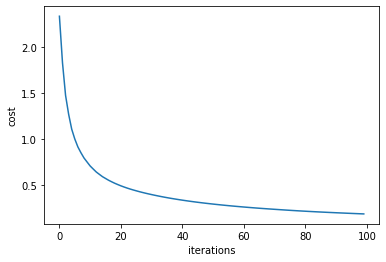

In [235]:
t = np.arange(0,iterations)
plt.plot(t, Cost_list)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()

In [236]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_propagation(inp, parameters)
    a_out = forward_cache['A2']    
    a_out = np.argmax(a_out, 0)
    labels = np.argmax(labels, 0)
    acc = np.mean(a_out == labels)*100
    return acc

In [238]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 97.5 %
Accuracy of Test Dataset 86.29 %


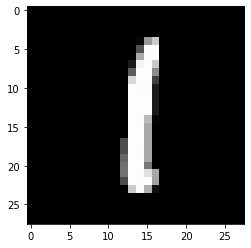

Our model says it is : 1


In [255]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['A2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])